In [50]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Library for Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
# Data and Visulization library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio

In [53]:
cardata=pd.read_csv("cardata.csv")

In [54]:
cardata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [55]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [56]:
cardata.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [57]:
cardata.shape

(301, 9)

In [58]:
cardata.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [59]:
## Visulizing data and EDA
px.bar(cardata,x=cardata.Car_Name.value_counts().keys(),y=cardata.Car_Name.value_counts().tolist(),
       color=cardata.Car_Name.value_counts().keys())

**City is having maximum Sell**

In [60]:
px.bar(cardata,x=cardata.Transmission.value_counts().keys(),y=cardata.Transmission.value_counts().tolist(),
       color=cardata.Transmission.value_counts().keys())

In [61]:
px.box(cardata,y=cardata.Selling_Price,x=cardata.Transmission)

## Automatic Cars are having High Selling Price

In [62]:
px.box(cardata,y=cardata.Selling_Price,x=cardata.Fuel_Type,color=cardata.Fuel_Type)

## Diesel Cars are having High Selling Price

In [63]:
px.box(cardata,y=cardata.Selling_Price,x=cardata.Seller_Type)

## Delers cars are having more Price

In [64]:
px.scatter_3d(cardata,x="Year",y="Selling_Price",z="Kms_Driven",color="Fuel_Type",template="ggplot2")

In [65]:
#cardata.Year.astype(object)
cardata.Owner.astype(int)
cardata.Year.astype(object)
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [66]:
cardata.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [67]:
#Preparing Dummy Variable for year
#yeardummy=pd.get_dummies(cardata['Year'],prefix='year',drop_first = True)
fueldummy=pd.get_dummies(cardata['Fuel_Type'],prefix='Fuel_Type',drop_first = True)
sellerdummy=pd.get_dummies(cardata['Seller_Type'],prefix='Seller_Type',drop_first = True)
transdummy=pd.get_dummies(cardata['Transmission'],prefix='Transmission',drop_first = True)

In [68]:
cardf = pd.concat([cardata,fueldummy,sellerdummy,transdummy], axis = 1)

In [69]:
cardf.drop(["Fuel_Type","Seller_Type","Transmission"],axis=1,inplace=True)
cardf.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,0,1


In [70]:
cardf.drop(["Car_Name"],axis=1,inplace=True)

In [71]:
cardf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


## Data Spliting

In [61]:
df_train, df_test = train_test_split(cardf, train_size = 0.7, test_size = 0.3, random_state = 100)

In [62]:
## Scaling the data using min-max scaler
scaler = MinMaxScaler()
# applying scaling to all numerical variables
num_vars = ['Year','Selling_Price', 'Present_Price', 'Kms_Driven']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [63]:
y_train= df_train.pop('Selling_Price')
X_train= df_train

y_test= df_test.pop('Selling_Price')
X_test= df_test

In [64]:
print(y_train.shape,"\n")
print(X_train.shape,"\n")
print(y_test.shape,"\n")
print(X_test.shape,"\n")

(210,) 

(210, 8) 

(91,) 

(91, 8) 



In [65]:
# Recursice Feature Elimination -  This the automatic technic. for Selecting Feture
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [66]:
#all the columns
# list(zip(X_train.columns,rfe.support_,rfe.ranking_))
# Columns rejected by RFE
#X_train.columns[~rfe.support_]

In [67]:
# Columns selected by RFE
## Storing Column list which are Accepeted by RFE
col = X_train.columns[rfe.support_]
## Selecting Colums which are selected by RFE
X_train = X_train[col]

In [68]:
## Creating Dummy column for Intercept
X_train = sm.add_constant(X_train)

In [69]:
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     215.4
Date:                Mon, 11 May 2020   Prob (F-statistic):           3.22e-94
Time:                        23:52:05   Log-Likelihood:                 344.43
No. Observations:                 210   AIC:                            -670.9
Df Residuals:                     201   BIC:                            -640.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

## From above Summary we can check that 'const','Fuel_Type_Petrol','Owner','Kms_Driven'
## These variable shall be dropped One by one final model can be derived

In [70]:
## Now we will Check VIF value
X_train_vif = X_train.drop(['const','Fuel_Type_Petrol',"Owner","Kms_Driven"], axis=1)
# Calculate the VIFs for the new model
VIF=pd.Series([variance_inflation_factor(X_train_vif.values, i) 
               for i in range(X_train_vif.shape[1])], 
              index=X_train_vif.columns)

print(VIF)

Year                      6.239072
Present_Price             2.228955
Fuel_Type_Diesel          1.693861
Seller_Type_Individual    1.839481
Transmission_Manual       4.943489
dtype: float64


In [71]:
X_train1=X_train.drop(["Fuel_Type_Petrol","Owner","Kms_Driven"],axis=1)
lm1 = sm.OLS(y_train,X_train1).fit()   # Running the linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     343.5
Date:                Mon, 11 May 2020   Prob (F-statistic):           2.98e-97
Time:                        23:52:33   Log-Likelihood:                 342.71
No. Observations:                 210   AIC:                            -673.4
Df Residuals:                     204   BIC:                            -653.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

const
Present_Price
Kms_Driven
year_2009
year_2010
year_2015
year_2017
Fuel_Type_Diesel

## lm1 : Sellin_price= (-0.0470) + (0.18) Year + (1.06) Present_price + (0.056) Fuel_Type_Diesel + (-0.0317) Seller_Type_Individual + (-0.0424) Transmission_Manual

## Residual Analysis on Training Data

Text(0.5, 0, 'Errors')

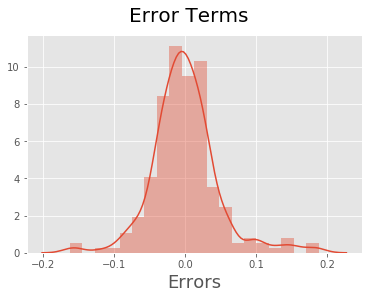

In [72]:
# Predicting on trining set 
y_train_pred = lm1.predict(X_train1)
# Plot the histogram of the error terms
fig = plt.figure()
res=(y_train - y_train_pred)
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [73]:
from sklearn.metrics import r2_score
y_train_pred = lm1.predict(X_train1)
print (r2_score(y_train, y_train_pred))

0.8938373795682264


## From Graph We can say that all Errors are distrubuted Normally
## We can say that mean error is 0

## Model Evaluation

In [74]:
# Creating X_test_new dataframe by dropping variables from X_test
# Adding a constant variable 
X_test = sm.add_constant(X_test)

In [75]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test = X_test[X_train1.columns]

In [76]:
# Making predictions
y_test_pred = lm1.predict(X_test)

Text(0, 0.5, 'y_pred')

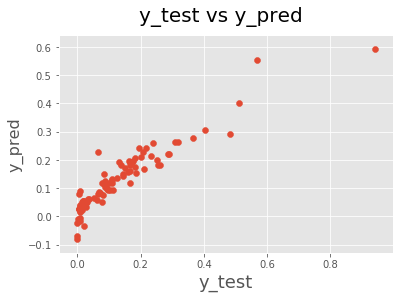

In [77]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                       # Y-label

In [78]:
from sklearn.metrics import r2_score
print (r2_score(y_test, y_test_pred))

0.8386929052867962


## Using PCA

### First we need to SCALE cariable

In [301]:
cardfpca=cardf

In [302]:
df_trainpca, df_testpca = train_test_split(cardfpca, train_size = 0.7, test_size = 0.3, random_state = 100)

In [307]:
## Scaling the data using min-max scaler
scalerpca = StandardScaler()
# applying scaling to all numerical variables
num_varspca = ['Year','Selling_Price', 'Present_Price', 'Kms_Driven']

df_trainpca[num_varspca] = scalerpca.fit_transform(df_trainpca[num_varspca])
df_testpca[num_varspca] = scalerpca.transform(df_testpca[num_varspca])

In [311]:
## we can retrive original using below code or scaler.inverse_transform
## means = scalerpca.mean_ 
## varns = scalerpca.var_
## print("means=",means,"\n")
## print("varns=",varns,"\n")

#def scale_data(array,means=means,stds=vars **0.5):
#    return (array-means)/stds
#scale_new_data = scale_data(new_data)

means= [-1.08442356e-14  0.00000000e+00 -6.76707367e-17 -4.22942105e-17] 

varns= [1. 1. 1. 1.] 



In [245]:
trnY=df_trainpca.pop("Selling_Price")
trnX=df_trainpca

tstY=df_testpca.pop("Selling_Price")
tstX=df_testpca

In [246]:
from sklearn.decomposition import PCA

In [247]:
pca=PCA(n_components=3)

In [248]:
trnX=pca.fit_transform(trnX)
tstX=pca.transform(tstX)

In [249]:
print(trnX.shape)
print(tstX.shape)

(210, 3)
(91, 3)


In [250]:
trnX = sm.add_constant(trnX)
tstX = sm.add_constant(tstX)

In [251]:
lmpca = sm.OLS(trnY,trnX).fit()   # Running the linear model
print(lmpca.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     549.7
Date:                Tue, 12 May 2020   Prob (F-statistic):           5.28e-98
Time:                        23:19:15   Log-Likelihood:                -67.209
No. Observations:                 210   AIC:                             142.4
Df Residuals:                     206   BIC:                             155.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0      0.023          0      1.0

Text(0.5, 0, 'Errors')

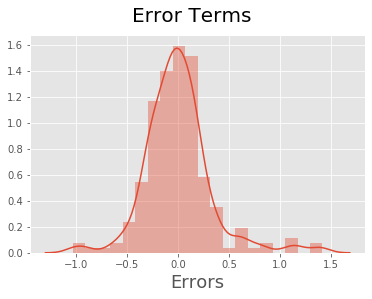

In [252]:
# Predicting on trining set 
y_trainpca_pred = lmpca.predict(trnX)
# Plot the histogram of the error terms
fig = plt.figure()
res=(trnY - y_trainpca_pred)
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [253]:
from sklearn.metrics import r2_score
print (r2_score(trnY, y_trainpca_pred))

0.8889516851088558


In [254]:
from sklearn.metrics import r2_score
y_testpca_pred = lmpca.predict(tstX)
print (r2_score(tstY, y_testpca_pred))

0.8398423365465238
